In [2]:
from ipynb.fs.full.functions import import_data
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers, regularizers
import numpy as np
import keras.utils
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


### Import data

In [3]:
#X train also contains cross validation set. model.fit will split it between training and cross validation
X, X_train, X_test, y_train, y_test = import_data('Database_2.csv')
input_size = X_train.shape[1]
print(X_train.shape)
print(y_train.shape)
print(input_size)

(3004, 17)
(3004, 1)
17


### Build model 

In [4]:
model = Sequential()

model.add(Dense(512, activation='relu', input_dim=input_size,kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.00)))
model.add(Dropout(0.2))
#model.add(Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.00)))
#model.add(Dropout(0.2))
#model.add(Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.00)))
#model.add(Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.00)))
model.add(Dense(1, activation='sigmoid'))

### Compile model

In [5]:
optimizer = optimizers.Adam(lr=0.001, beta_1 = 0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Train model

In [6]:
#X_train is 0.8 of total data set so cross validation needs to be 0.25 of X_train to be 0.2 of total dataset
history = model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=32, verbose = 1)

Train on 2253 samples, validate on 751 samples
Epoch 1/10
2253/2253 [==============================] - 0s 162us/step - loss: 1.0499 - acc: 0.6458 - val_loss: 0.7836 - val_acc: 0.7204
Epoch 2/10
2253/2253 [==============================] - 0s 41us/step - loss: 0.8879 - acc: 0.6733 - val_loss: 0.7323 - val_acc: 0.7230
Epoch 3/10
2253/2253 [==============================] - 0s 38us/step - loss: 0.8099 - acc: 0.6893 - val_loss: 0.7398 - val_acc: 0.7044
Epoch 4/10
2253/2253 [==============================] - 0s 39us/step - loss: 0.7655 - acc: 0.6778 - val_loss: 0.7066 - val_acc: 0.7230
Epoch 5/10
2253/2253 [==============================] - 0s 47us/step - loss: 0.7858 - acc: 0.6871 - val_loss: 0.6732 - val_acc: 0.7230
Epoch 6/10
2253/2253 [==============================] - 0s 39us/step - loss: 0.8139 - acc: 0.6800 - val_loss: 0.6649 - val_acc: 0.7204
Epoch 7/10
2253/2253 [==============================] - 0s 38us/step - loss: 0.7627 - acc: 0.6933 - val_loss: 0.7073 - val_acc: 0.6964
Epoch 8

### Plot results

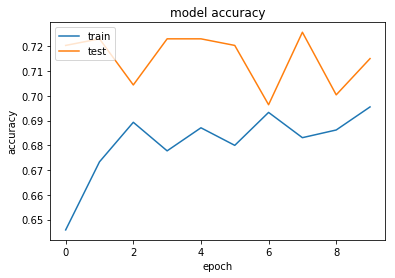

In [7]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Accuracy on test set

In [8]:
model.evaluate(x=X_test, y=y_test,batch_size=10, verbose=1)

751/751 [==============================] - 0s 42us/step


[0.6717266887227958, 0.7043941398355837]

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               9216      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results = model.predict(X, batch_size=None, verbose=0, steps=None)

In [ ]:
#convert back from one-hot encoding to labels
results = np.argmax(results, axis = -1)


In [ ]:


results = pd.DataFrame(results, columns=['results']).to_csv('Database_1_results.csv')